In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autotime

# Problem 1 (K-means)

In [106]:
np.random.seed(42)

N = 500
weights = [0.2, 0.5, 0.3]
mean = np.array([[0,0], [3,0], [0,3]])
cov = np.array([[1,0],[0,1]])

data =  np.empty((0,2), int)
index = np.random.choice([0,1,2], N, p= weights)

for i in index:
    sample = np.random.multivariate_normal(mean[index[i]], cov, 1)
    data = np.append(data, sample, axis=0)

time: 86 ms


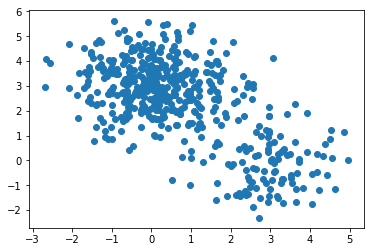

time: 232 ms


In [107]:
plt.scatter(data[:,0],data[:,1])

### K-means funcitons

In [108]:
def initialize_centroids(data, k):
    """returns k centroids from the initial points"""
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

time: 2.82 ms


In [109]:
def kmeans(data, k, centroids, iteration):

    L = []
    centroids_array = np.zeros([0,2])
    for i in range(iteration+1):
        distance = np.zeros([data.shape[0],])
        n = np.zeros([1,])

        for i in range(k):
            d = LA.norm((data - centroids[i,:]), axis=1)
            distance = np.vstack((distance, d))
        distance = np.delete(distance, (0), axis=0)

        for i in np.arange(500):
            a = np.where(distance[:,i] == distance[:,i].min())[0]
            n = np.vstack((n,a))
        n = np.delete(n, (0), axis=0)
        n = n.reshape(500,)

        centroids = np.array([data[n==k].mean(axis=0) for k in range(centroids.shape[0])])
#         centroids_array = np.vstack((centroids_array, centroids))

        L.append(np.sum([np.sum(LA.norm((data[n==k] - centroids[k]), axis=1), axis=0) for k in range(centroids.shape[0])]))
        
    return n, centroids, L

time: 22 ms


In [110]:
centroids = initialize_centroids(data, 5)

clusters_5, centroids_poisition_5, L_5 = kmeans(data,5, centroids, 20)
clusters_4, centroids_poisition_4, L_4 = kmeans(data,4, centroids, 20)
clusters_3, centroids_poisition_3, L_3 = kmeans(data,3, centroids, 20)
clusters_2, centroids_poisition_2, L_2 = kmeans(data,2, centroids, 20)

/Users/Amiros/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Amiros/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


time: 614 ms


## 1-a

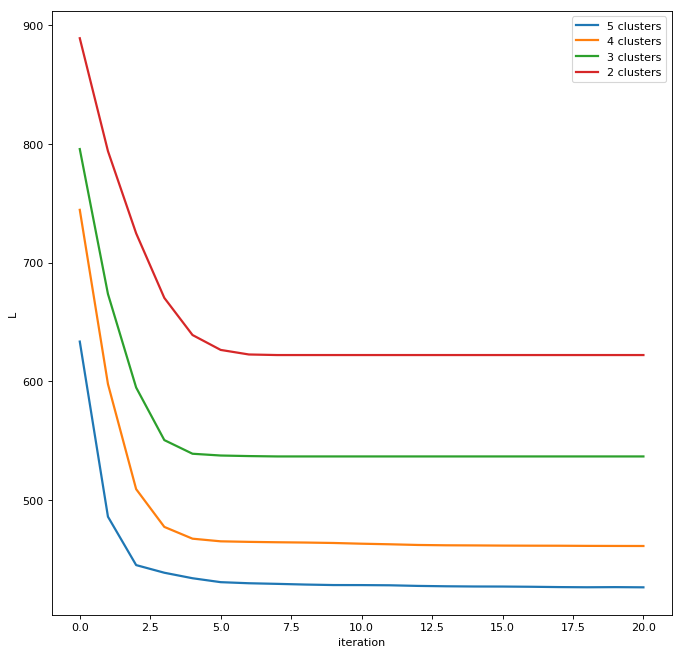

time: 373 ms


In [111]:
plt.figure(num=None, figsize=(10, 10), dpi=80)

plt.plot(L_5, label="5 clusters", linewidth=2)
plt.plot(L_4, label="4 clusters", linewidth=2)
plt.plot(L_3, label="3 clusters", linewidth=2)
plt.plot(L_2, label="2 clusters", linewidth=2)

plt.xlabel("iteration")
plt.ylabel("L")
plt.legend(loc=1)

## 1-b

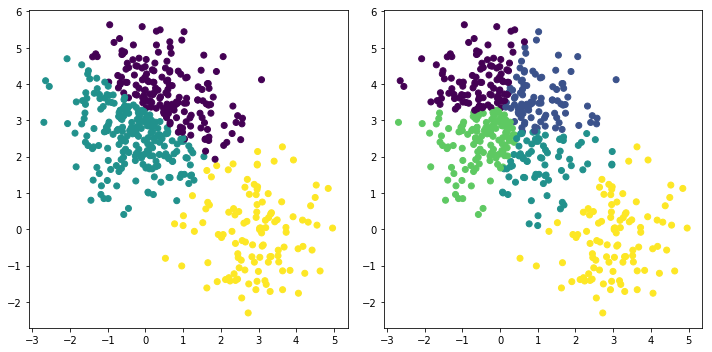

time: 684 ms


In [112]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
figsize=(15, 10)
ax[1].scatter(data[:, 0], data[:, 1], c=clusters_5)
# ax[1].scatter(centroids[:, 0], centroids_poisition_5[:, 1], c='r', s=100)

ax[0].scatter(data[:, 0], data[:, 1], c=clusters_3)
# ax[0].scatter(centroids[:, 0], centroids_poisition_3[:, 1], c='r', s=100)
fig.tight_layout()

# Problem 2 (Matrix factorization)

In [2]:
#load train data as numpy array
X = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw4-kmeans/data/ratings.csv', 
          delimiter=',')
y = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw4-kmeans/data/ratings_test.csv', 
          delimiter=',')

y_test = np.full( (943, 1682), np.nan)
y[:,0] -= 1
y[:,1] -= 1
y_test[y[:,0].astype(int), y[:,1].astype(int)] = y[:,2]

time: 650 ms


In [3]:
import pandas as pd
df = pd.DataFrame(X)
df = df.pivot(index= 0, columns=1, values=2)

# list(set(list(range(1,1682))) - set(list(df)))
df[1604] = np.nan
df[1637] = np.nan
df[1577] = np.nan
df[1325] = np.nan
df[1681] = np.nan
df[1414] = np.nan

df.shape
### make an index list for movies from the raw data

(943, 1682)

time: 735 ms


In [4]:
# np.argwhere(np.isnan(df.values))
M = df.values
omega = np.argwhere(np.isfinite(M))

time: 50.9 ms


In [5]:
# problem intialization
d = 10
lmbda = 1
variance = 0.25
steps = 100

# number of users
N_1 = df.shape[0]
u = np.random.randn(N_1, d)

# number of movies
N_2 = df.shape[1]
v = np.random.randn(d, N_2)

time: 7.56 ms


In [59]:
objective = pd.DataFrame()
RMSE = []
v_arr = [[]]
u_arr = [[]]

for zzz in range(1,11):
    ## initialize the values
    N_2 = df.shape[1]
    v = np.random.randn(d, N_2)
    L = []
    u_updated = np.empty((0,10))

    for k in range(N_1):
        j = omega[omega[:,0] == k][:,1]
        v_j =v[:,j]

        a = LA.inv((lmbda * variance * np.eye(d)) + v_j.dot(v_j.T))
        M_kj = M[k,:][~np.isnan(M[k,:])].reshape(-1,1)
        aaa = v_j.dot(M_kj)
        u = a.dot(aaa)
        u_updated = np.append(u_updated, u.T, axis=0)

    #run for 100 times
    for iteration in range(1,101):
        v_updated = np.empty((10,0))
        for z in range(N_2):
            i = omega[omega[:,1] == z][:,0]
            u_i = u_updated[i,:]

            noise_v = LA.inv((lmbda * variance * np.eye(d)) + u_i.T.dot(u_i))
            M_iz = M[:,z][~np.isnan(M[:,z])]
            v_new = noise_v.dot(u_i.T.dot(M_iz))
            v_updated = np.append(v_updated, v_new.reshape(-1,1), axis=1)

        u_updated = np.empty((0,10))
        for k in range(N_1):
            j = omega[omega[:,0] == k][:,1]
            v_j =v_updated[:,j]

            noise_u = LA.inv((lmbda * variance * np.eye(d)) + v_j.dot(v_j.T))
            M_kj = M[k,:][~np.isnan(M[k,:])].reshape(-1,1)
            u = noise_u.dot(v_j.dot(M_kj))
            u_updated = np.append(u_updated, u.T, axis=0) 

        l =  - (16 * np.nansum(np.square(M - u_updated.dot(v_updated)))) - (np.sum(0.5 * np.power(LA.norm(u_updated, axis = 1), 2))) - (np.sum(0.5 * np.power(LA.norm(v_updated, axis = 0), 2)))
        L.append(l)
        
    objective[zzz] = L
    v_arr.append(v_updated)
    u_arr.append(u_updated)
    
    y_pred = u_updated.dot(v_updated)
    rmse = np.sqrt(np.nansum((y_pred - y_test) ** 2)/5000)
    RMSE.append(rmse)

time: 22min 20s


## 2-a

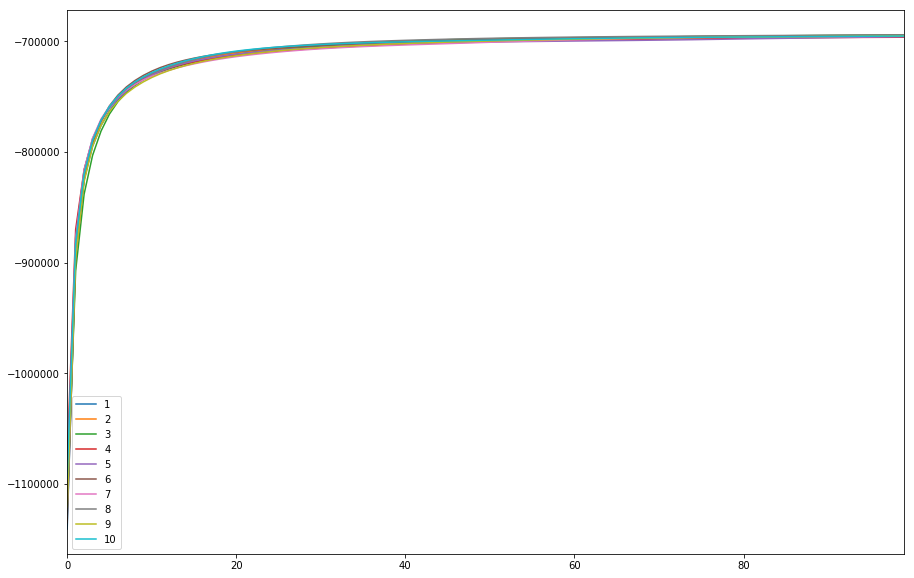

time: 470 ms


In [60]:
objective.plot(figsize=(15, 10))

In [64]:
final_tabel = objective.tail(n=1).T
final_tabel = final_tabel.rename(columns = {99:'Training Objective Function'})
final_tabel['RMSE'] = RMSE
final_tabel = final_tabel.reset_index()
final_tabel.sort(['Training Objective Function'], ascending=[0])

/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,Training Objective Function,RMSE
7,8,-694244.026866,1.141555
2,3,-694279.898654,1.119178
5,6,-694590.687893,1.167750
8,9,-695183.995831,1.104397
9,10,-695276.160886,1.106127
6,7,-695510.291230,1.121134
4,5,-695862.094710,1.098875
0,1,-695961.973466,1.123558
1,2,-696031.481083,1.131147
3,4,-696340.192714,1.100622


time: 24.7 ms


## 2-b

In [76]:
M8 =  u_arr[8].dot(v_arr[8])

time: 13.3 ms


In [97]:
star_wars = LA.norm(M8 - M8[:, 49].reshape(-1,1), axis = 0).astype(int)
my_fairy_lady = LA.norm(M8 - M8[:, 484].reshape(-1,1), axis = 0).astype(int)
goodfellas = LA.norm(M8 - M8[:, 181].reshape(-1,1), axis = 0).astype(int)

time: 50.9 ms


In [105]:
goodfellas.argsort()[:11] +1

array([182, 177, 188,  56, 693, 469, 346, 183, 504, 135, 187])

time: 5.32 ms
